## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
sb.set()

## Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Loading the data set

In [3]:
data=pd.read_csv("/content/drive/MyDrive/deep learning assignment/healthcare-dataset-stroke-data.csv")

In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.shape

(5110, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [10]:
data.drop(columns=['id'],inplace=True)

In [11]:
data.dropna(inplace=True)

In [12]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
# printing unique value of categorical data
for col in data.columns:
    if data[col].dtype == 'object':
        unique_values = pd.unique(data[col])
        print(f'{col} : {unique_values}\n')

gender : ['Male' 'Female' 'Other']

ever_married : ['Yes' 'No']

work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

Residence_type : ['Urban' 'Rural']

smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']



In [14]:
Correlation =data.corr()
Correlation

<ipython-input-14-d505ede0ce3d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation =data.corr()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.274425,0.257123,0.235838,0.333398,0.232331
hypertension,0.274425,1.000000,0.115991,0.180543,0.167811,0.142515
heart_disease,0.257123,0.115991,1.000000,0.154525,0.041357,0.137938
avg_glucose_level,0.235838,0.180543,0.154525,1.000000,0.175502,0.138936
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.232331,0.142515,0.137938,0.138936,0.042374,1.000000


<Axes: >

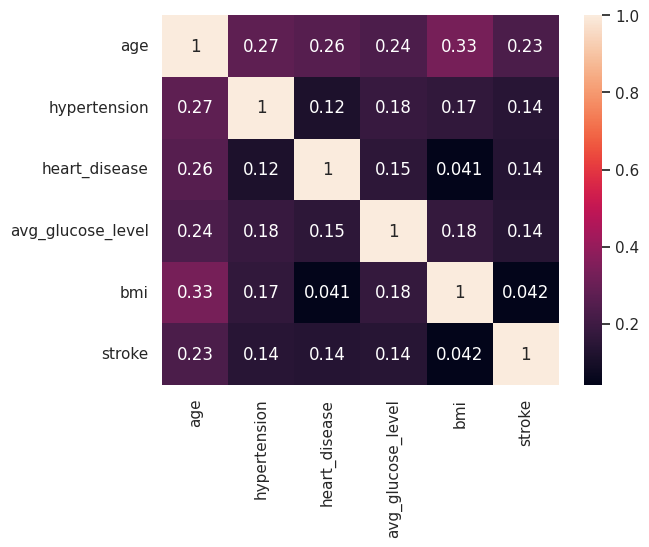

In [15]:
sb.heatmap(Correlation,xticklabels=Correlation.columns , yticklabels=Correlation.columns , annot=True)

In [16]:
data["age"].describe()

count    4909.000000
mean       42.865374
std        22.555115
min         0.080000
25%        25.000000
50%        44.000000
75%        60.000000
max        82.000000
Name: age, dtype: float64

In [17]:
data["avg_glucose_level"].describe()

count    4909.000000
mean      105.305150
std        44.424341
min        55.120000
25%        77.070000
50%        91.680000
75%       113.570000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [18]:
data["bmi"].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [19]:
gender_count=data["gender"].value_counts()
gender_count

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender Count')

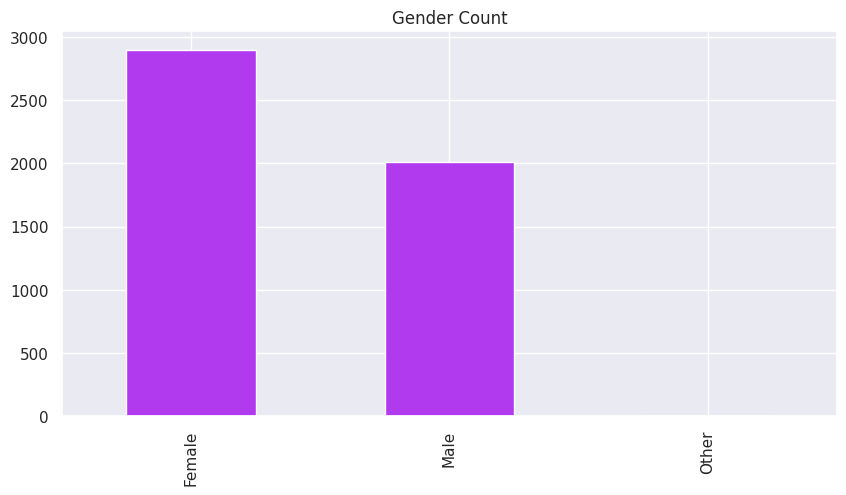

In [20]:
plt.figure(figsize= (10,5))
gender_count.plot(kind="bar" , color="#B23AEE")
plt.title("Gender Count")

In [21]:
married_counts=data["ever_married"].value_counts()
married_counts

Yes    3204
No     1705
Name: ever_married, dtype: int64

Text(0.5, 1.0, 'Married Count')

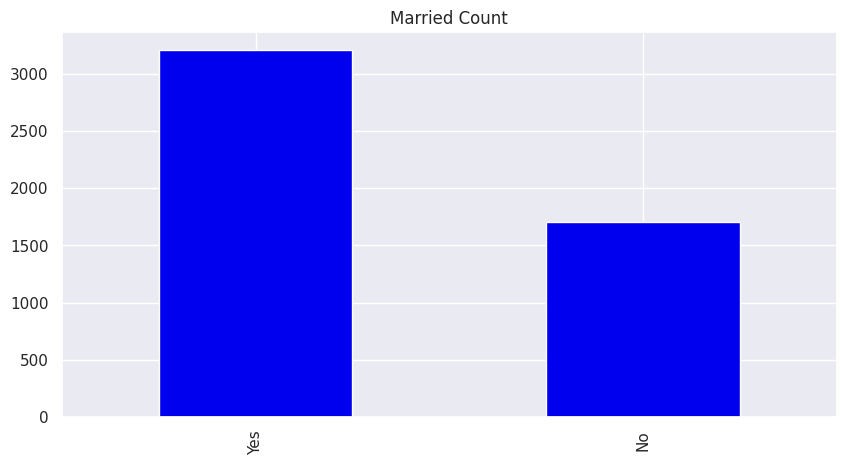

In [22]:
plt.figure(figsize= (10,5))
married_counts.plot(kind="bar" , color="#0000EE")
plt.title("Married Count")

In [23]:
work_type_counts=data["work_type"].value_counts()
work_type_counts

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

Text(0.5, 1.0, 'Work Type Count')

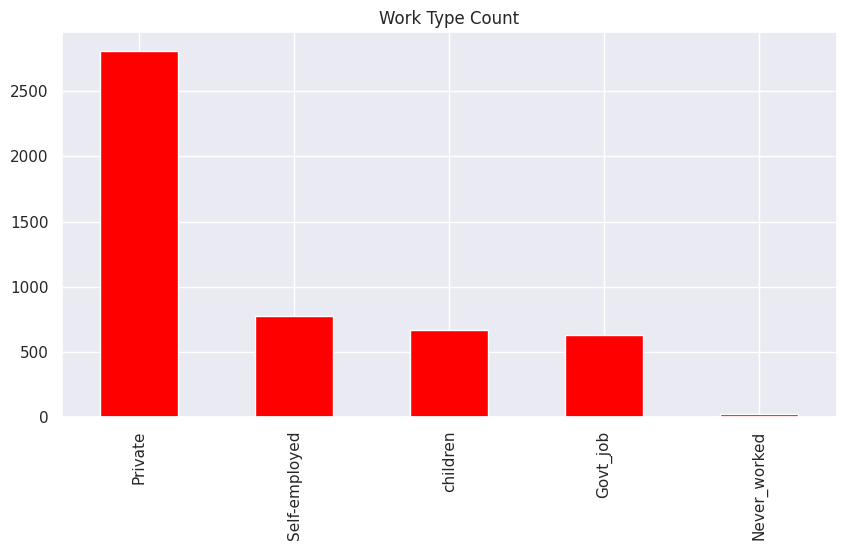

In [24]:
plt.figure(figsize= (10,5))
work_type_counts.plot(kind="bar" , color="#FF0000")
plt.title("Work Type Count")

In [25]:
Residence_type_counts=data["Residence_type"].value_counts()
Residence_type_counts

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64

Text(0.5, 1.0, 'Residence Type Count')

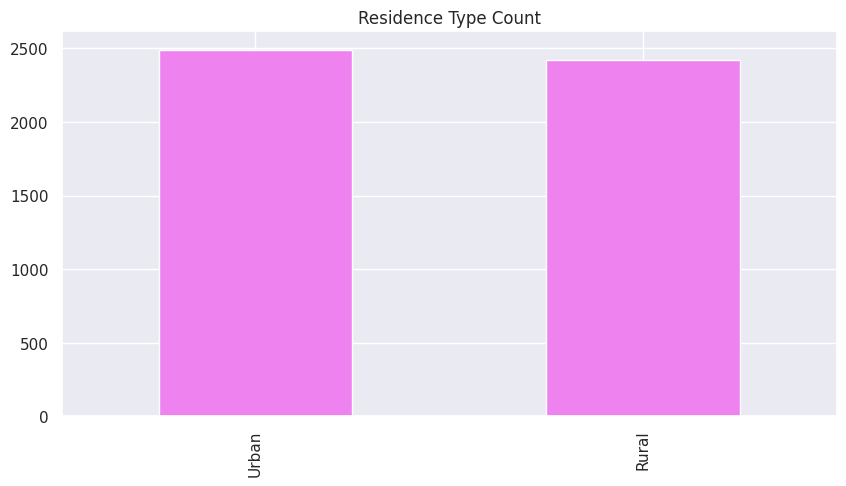

In [26]:
plt.figure(figsize= (10,5))
Residence_type_counts.plot(kind="bar" , color="#EE82EE")
plt.title("Residence Type Count")

In [27]:
smoking_counts=data["smoking_status"].value_counts()
smoking_counts

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

Text(0.5, 1.0, 'Smoking Count')

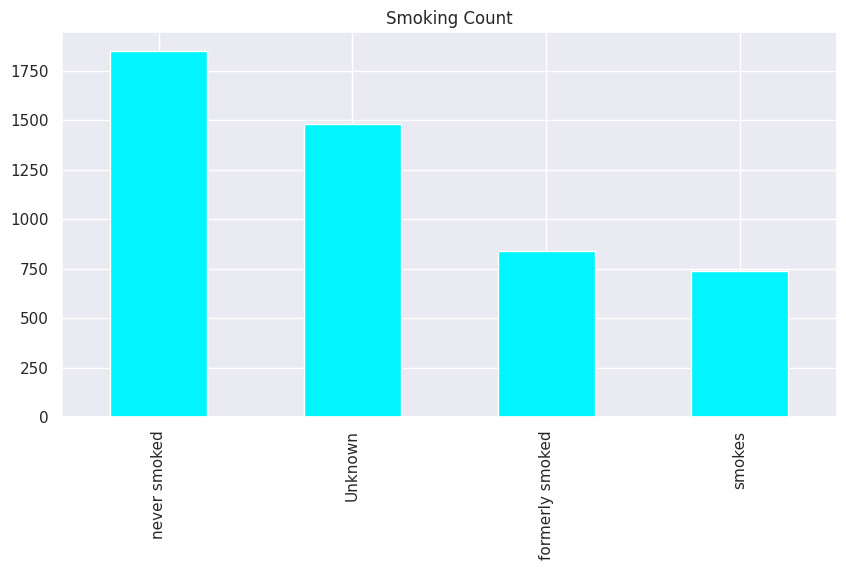

In [28]:
plt.figure(figsize= (10,5))
smoking_counts.plot(kind="bar" , color="#00F5FF")
plt.title("Smoking Count")

Text(0.5, 1.0, 'Age')

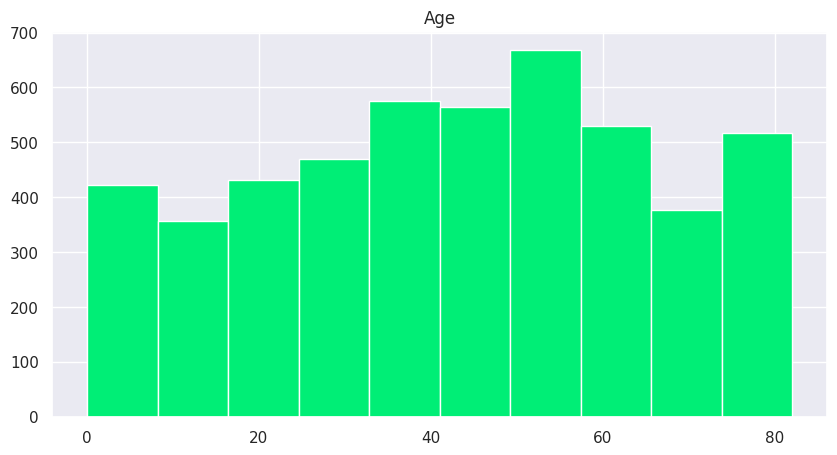

In [29]:
plt.figure(figsize= (10,5))
plt.hist(data['age'] , color="#00EE76")
plt.title("Age")

Text(0.5, 1.0, 'Average Glucose Level')

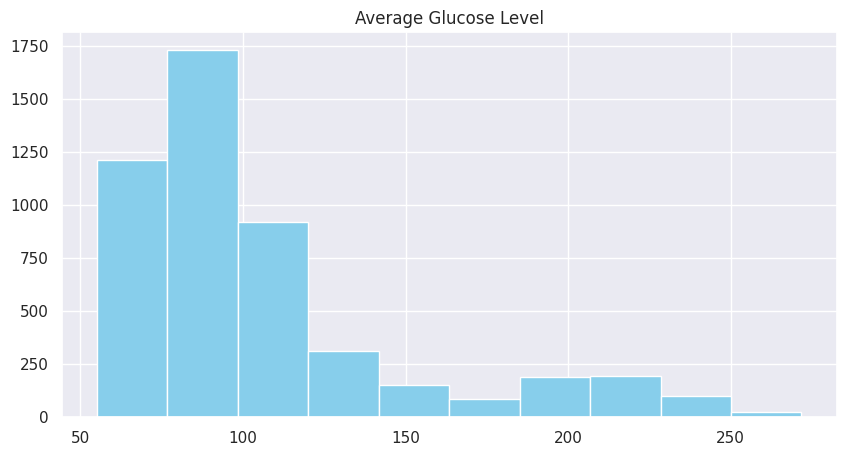

In [30]:
plt.figure(figsize= (10,5))
plt.hist(data['avg_glucose_level'] , color="#87CEEB")
plt.title("Average Glucose Level")

Text(0.5, 1.0, 'BMI')

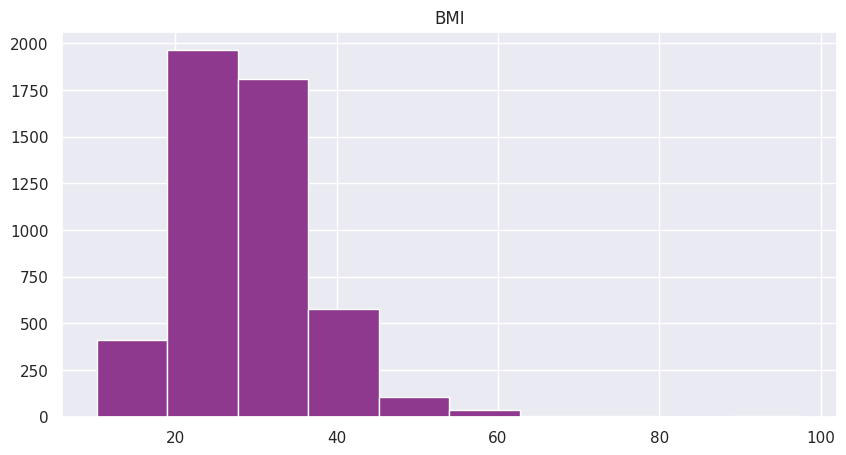

In [31]:
plt.figure(figsize= (10,5))
plt.hist(data['bmi'] , color="#8E388E")
plt.title("BMI")

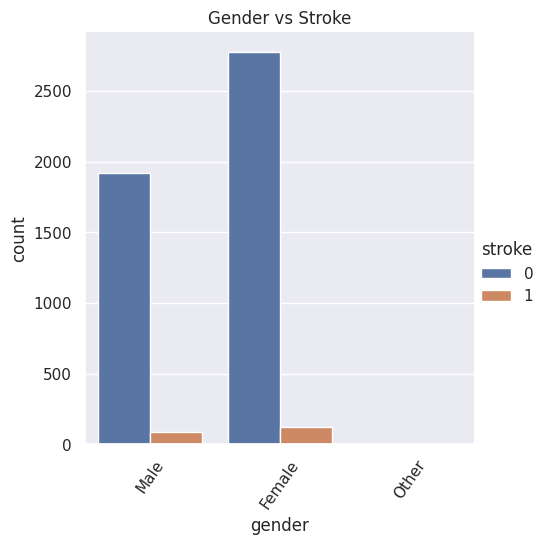

In [32]:
sb.catplot(data=data,x='gender',kind='count',hue='stroke')
plt.xticks(rotation=55)
plt.title("Gender vs Stroke")
plt.show()

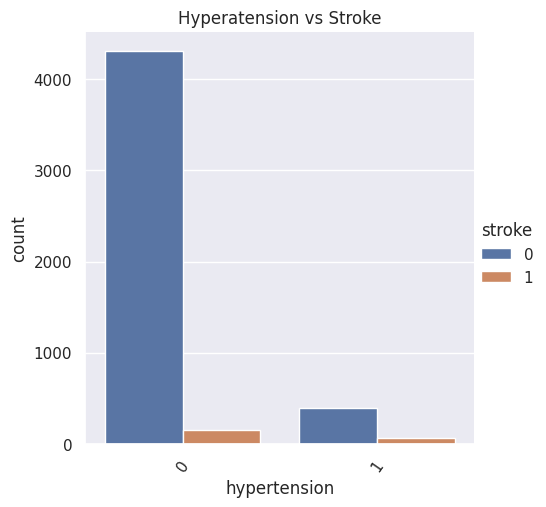

In [33]:
sb.catplot(data=data,x='hypertension',kind='count',hue='stroke')
plt.xticks(rotation=55)
plt.title("Hyperatension vs Stroke")
plt.show()

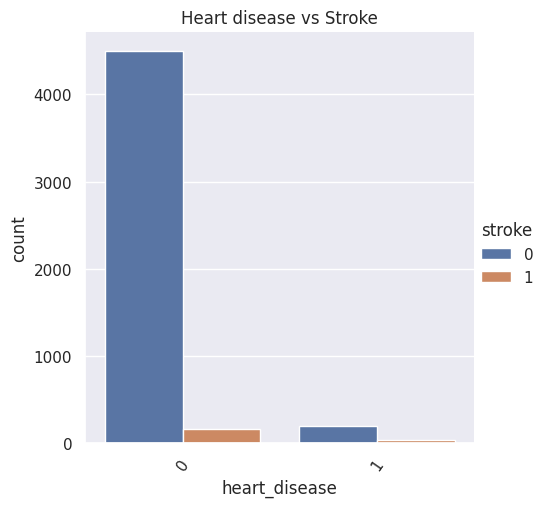

In [34]:
sb.catplot(data=data,x='heart_disease',kind='count',hue='stroke')
plt.xticks(rotation=55)
plt.title("Heart disease vs Stroke")
plt.show()

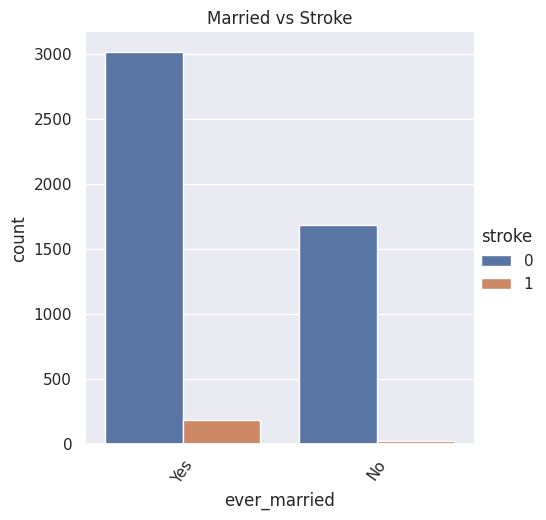

In [35]:
sb.catplot(data=data,x='ever_married',kind='count',hue='stroke')
plt.xticks(rotation=55)
plt.title("Married vs Stroke")
plt.show()

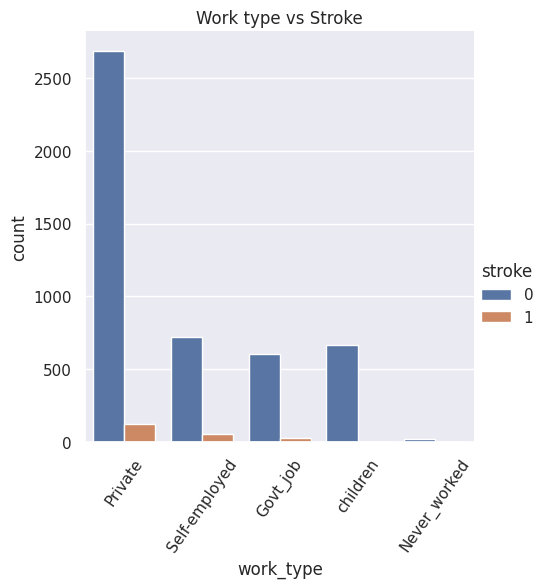

In [36]:
sb.catplot(data=data,x='work_type',kind='count',hue='stroke')
plt.xticks(rotation=55)
plt.title("Work type vs Stroke")
plt.show()

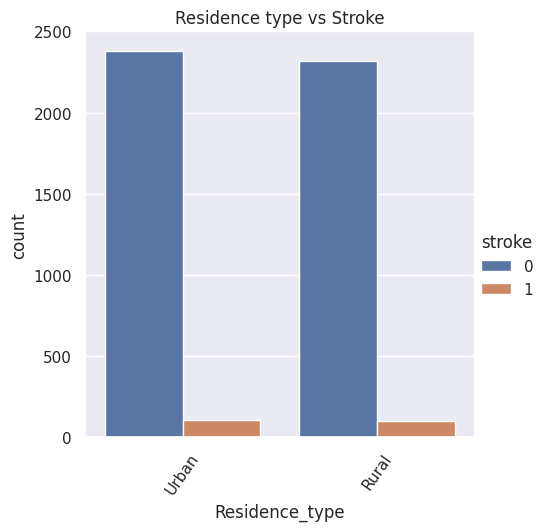

In [37]:
sb.catplot(data=data,x='Residence_type',kind='count',hue='stroke')
plt.xticks(rotation=55)
plt.title("Residence type vs Stroke")
plt.show()

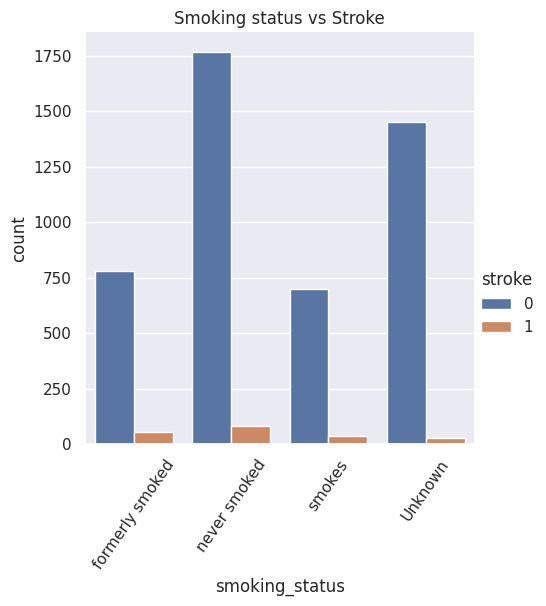

In [38]:
sb.catplot(data=data,x='smoking_status',kind='count',hue='stroke')
plt.xticks(rotation=55)
plt.title("Smoking status vs Stroke")
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

In [40]:
from sklearn.preprocessing import LabelEncoder
#creating an encoder
le=LabelEncoder()

In [41]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [42]:
df = data.apply(lambda x: object_to_int(x))

In [43]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [44]:
x = df.drop(columns = ['stroke'] )
y =df['stroke']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0,stratify=y)

In [46]:
print(x_train.shape)
print(x_test.shape)

(3927, 10)
(982, 10)


In [47]:
model=LogisticRegression()

In [48]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
y_Pred = model.predict(x_test)

In [50]:
accuracy = accuracy_score(y_test, y_Pred)
print('Accuracy:', accuracy)

Accuracy: 0.9572301425661914


In [51]:
#calculating the classification accuracies
print("Training Accuracy", model.score(x_train, y_train))
print("Testing Accuracy", model.score(x_test, y_test))

Training Accuracy 0.9574738986503692
Testing Accuracy 0.9572301425661914


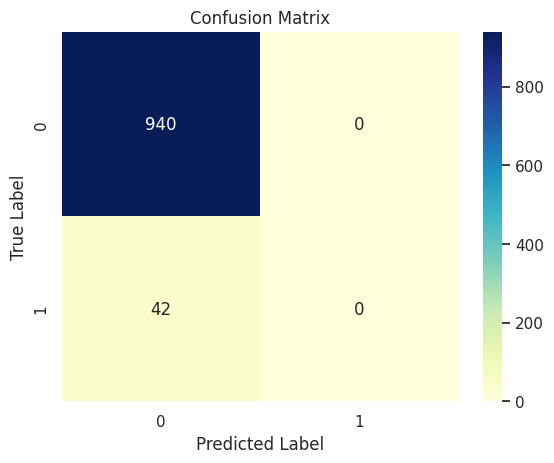

In [52]:
from sklearn.metrics import confusion_matrix

# compute confusion matrix
cm = confusion_matrix(y_test, y_Pred)

# display the confusion matrix as a heatmap
sb.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")

# customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [53]:
# generate classification report
report = classification_report(y_test, y_Pred)

# print the report
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
